In [1]:
# Base utilities
import os

# Data Mining
import math
import random
random_state = 42
random.seed(random_state)
seed=random_state
import numpy as np 
import pandas as pd
import geopandas as gpd
import osmnx as ox
import pandana as pdn
import pickle as pkl

# Plot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import seaborn as sns

# Learning
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split, KFold

# Models
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Directories (Si no existen se crean)
for d in ["data", "logs", "models", "networks"]:
    if not os.path.isdir(d):
        os.mkdir(d)

In [2]:
trips = pd.read_csv(f"data/Guadalajara_encoded_SEMS + NO SEMS_OK.csv",index_col=0)
trips = trips.drop(columns=['Centro específico','Tiempo origen-destino','Latitud','Longitud','Latitud_centro','Longitud_centro'])

#print(trips.head().columns)

trips = trips.drop(trips[trips['Modo transporte'] == 'Public Transportation'].sample(38000).index)
# Reiniciar los índices
trips.reset_index(drop=True, inplace=True)

trips = trips.sample(frac=1).reset_index(drop=True)



# Model Training and Evaluation

## Train-Test Split

In [3]:
# X = np.array(trips.drop(columns="Modo transporte"))
# y = np.array( trips["Modo transporte"] )

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [4]:
# Load the 'what_if_X' dataframe
what_if_X = pd.read_csv("data/What-if 1_encoded_OK.csv", sep=',', index_col=0)
# Hacer una copia de la columna 'Modo transporte' antes de eliminarla
modo_transporte_copia = what_if_X['Modo transporte'].copy()
# Eliminar las columnas especificadas
what_if_X = what_if_X.drop(columns=['Centro específico','Tiempo origen-destino','Latitud','Longitud','Latitud_centro','Longitud_centro','Modo transporte'])
    

In [5]:

predicts = pd.DataFrame()

## Model Training/Evaluation Framework

In [6]:
models = {}

def train_evaluate(model, k=10, cross_validation=True):
    model_name = type(model).__name__



    # Final Model
    print("\nFinal Model\n")
    # Model Training
    model = model.fit(X_train, y_train)
    print("Accuracy: ", model.score(X_test, y_test), "\n")
    # Prediction and Report
    y_pred = model.predict(X_test)
    #print("Classification Report\n")
    #print(metrics.classification_report(y_test, y_pred), "\n")
   



    # Make predictions on 'what_if_X'
    what_if_y_pred = model.predict(what_if_X)


    # Suponiendo que what_if_y_pred es tu variable de interés

    # Add a new column "Mobility choice" to the dataframe with predictions
    predicts["Mobility choice"] = what_if_y_pred
    print(predicts["Mobility choice"].value_counts())

 
    

    # # Save the modified dataframe to a new CSV file
    # what_if_X.to_csv("data/What-if 1_pred_OK.csv")

Decoded data of the What-if

## Model Definition and Evaluation

## Random Forest

In [7]:
for i in range(100):

    trips = pd.read_csv(f"data/Guadalajara_encoded_SEMS + NO SEMS_OK.csv",index_col=0)
    trips = trips.drop(columns=['Centro específico','Tiempo origen-destino','Latitud','Longitud','Latitud_centro','Longitud_centro'])

    #print(trips.head().columns)-
    trips = trips.drop(trips[trips['Modo transporte'] == 'Public Transportation'].sample(38000).index)
    # Reiniciar los índices
    trips.reset_index(drop=True, inplace=True)
    trips = trips.sample(frac=1).reset_index(drop=True)

    X = np.array(trips.drop(columns="Modo transporte"))
    y = np.array( trips["Modo transporte"] )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)




    
    rf = RandomForestClassifier(n_estimators=20, random_state=random_state)
    train_evaluate(rf)
    
    column_name = f"Run_{i}"
    predicts.rename(columns={"Mobility choice": column_name}, inplace=True)
  

# Agregar de nuevo la columna 'Modo transporte' al DataFrame
what_if_X['Modo transporte'] = modo_transporte_copia
what_if_X = pd.concat([what_if_X, predicts], axis=1)

#Save the modified dataframe to a new CSV file
what_if_X.to_csv("data/What-if 1_pred_OK.csv")


Final Model

Accuracy:  0.7540389699402722 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    12574
Walk                      4392
Private auto              1422
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7464995593850974 

Public Transportation    9375
Walk                     7369
Private auto             1644
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.757074317046901 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     8379
Public Transportation    8113
Private auto             1896
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7448350141975913 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    9446
Walk                     7043
Private auto             1899
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.750318221874082 

Public Transportation    10158
Walk                      5763
Private auto              2467
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7502203074512875 

Public Transportation    12241
Walk                      4665
Private auto              1482
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.750514050719671 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    13872
Walk                      3023
Private auto              1493
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7534514834035053 

Public Transportation    12889
Walk                      3093
Private auto              2406
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7469891314990698 

Public Transportation    12372
Walk                      4465
Private auto              1551
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7521785959071772 

Public Transportation    12338
Walk                      4180
Private auto              1870
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7501223930284932 

Public Transportation    11592
Walk                      5055
Private auto              1741
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7464995593850974 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    12342
Walk                      3879
Private auto              2167
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7488495055321649 

Public Transportation    9548
Walk                     6797
Private auto             2043
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.752570253598355 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    10792
Walk                      5085
Private auto              2511
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7497307353373152 

Public Transportation    12066
Walk                      4009
Private auto              2313
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7481641045726035 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    11497
Walk                      5022
Private auto              1869
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7514931949476158 

Public Transportation    11498
Walk                      5084
Private auto              1806
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7501223930284932 

Public Transportation    12657
Walk                      4760
Private auto               971
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.750318221874082 

Public Transportation    12921
Walk                      3261
Private auto              2206
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7518848526387937 

Public Transportation    11241
Walk                      5453
Private auto              1694
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7516890237932048 

Public Transportation    11500
Walk                      5422
Private auto              1466
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7541368843630667 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    12403
Walk                      4993
Private auto               992
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7562910016645452 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    11714
Walk                      4629
Private auto              2045
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7554097718593948 

Public Transportation    11830
Walk                      4623
Private auto              1935
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7472828747674533 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    10270
Walk                      5701
Private auto              2417
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7521785959071772 

Public Transportation    12434
Walk                      4122
Private auto              1832
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7575638891608734 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    10870
Walk                      5228
Private auto              2290
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7400372074806619 

Public Transportation    11133
Walk                      5704
Private auto              1551
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7513952805248213 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    11851
Walk                      5883
Private auto               654
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7497307353373152 

Public Transportation    10923
Walk                      6069
Private auto              1396
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7511994516792323 

Public Transportation    8993
Walk                     8572
Private auto              823
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7526681680211496 

Public Transportation    10252
Walk                      5823
Private auto              2313
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7571722314696955 

Public Transportation    11353
Walk                      5509
Private auto              1526
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7415059238225791 

Public Transportation    11948
Walk                      4524
Private auto              1916
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7517869382159992 

Public Transportation    10617
Walk                      6217
Private auto              1554
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7466953882306864 

Public Transportation    11920
Walk                      4440
Private auto              2028
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7517869382159992 

Walk                     8473
Public Transportation    7979
Private auto             1936
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7423871536277293 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    8396
Walk                     7457
Private auto             2535
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7499265641829042 

Public Transportation    10644
Walk                      6108
Private auto              1636
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7461079016939195 

Public Transportation    10886
Walk                      5554
Private auto              1948
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7488495055321649 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    11871
Walk                      4965
Private auto              1552
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7473807891902478 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    10663
Walk                      5963
Private auto              1762
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.748262018995398 

Public Transportation    14577
Walk                      2004
Private auto              1807
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7474787036130423 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    10757
Walk                      5236
Private auto              2395
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7508077939880544 

Public Transportation    11707
Walk                      5755
Private auto               926
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7499265641829042 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    12294
Walk                      4793
Private auto              1301
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7514931949476158 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    11764
Walk                      5404
Private auto              1220
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7450308430431802 

Public Transportation    11982
Walk                      4761
Private auto              1645
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7477724468814256 

Public Transportation    12498
Walk                      3854
Private auto              2036
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7512973661020268 

Public Transportation    8938
Walk                     6959
Private auto             2491
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7469891314990698 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    10962
Walk                      6040
Private auto              1386
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7500244786056987 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    13037
Walk                      3056
Private auto              2295
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7501223930284932 

Public Transportation    13478
Walk                      3641
Private auto              1269
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7533535689807108 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    10235
Walk                      6177
Private auto              1976
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7489474199549594 

Public Transportation    9632
Walk                     6789
Private auto             1967
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7494369920689318 

Public Transportation    11836
Walk                      4964
Private auto              1588
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7463037305395085 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    12658
Walk                      4153
Private auto              1577
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7506119651424655 

Public Transportation    11993
Walk                      3983
Private auto              2412
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7512973661020268 

Public Transportation    10356
Walk                      6857
Private auto              1175
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7461079016939195 

Public Transportation    14287
Walk                      2134
Private auto              1967
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7489474199549594 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    10117
Walk                      7074
Private auto              1197
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7540389699402722 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    12370
Walk                      4935
Private auto              1083
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7413100949769901 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    9226
Walk                     7589
Private auto             1573
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7558993439733672 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    13707
Walk                      3305
Private auto              1376
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7519827670615882 

Public Transportation    11215
Walk                      4747
Private auto              2426
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7540389699402722 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    12093
Walk                      3617
Private auto              2678
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7483599334181925 

Public Transportation    8205
Walk                     7602
Private auto             2581
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7515911093704103 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    11074
Walk                      5205
Private auto              2109
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7501223930284932 

Public Transportation    10882
Walk                      5393
Private auto              2113
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7440516988152355 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    11089
Walk                      4744
Private auto              2555
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7496328209145207 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    10270
Walk                      6164
Private auto              1954
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7511015372564379 

Public Transportation    12966
Walk                      2722
Private auto              2700
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7437579555468521 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    8625
Walk                     8475
Private auto             1288
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7459120728483306 

Public Transportation    12176
Walk                      3720
Private auto              2492
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7549201997454225 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    10704
Walk                      6390
Private auto              1294
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.746009987271125 

Public Transportation    12984
Walk                      3386
Private auto              2018
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7487515911093704 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    11969
Walk                      5438
Private auto               981
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7548222853226281 

Public Transportation    12019
Walk                      4741
Private auto              1628
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7472828747674533 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    11849
Walk                      4659
Private auto              1880
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.750514050719671 

Walk                     8267
Public Transportation    8075
Private auto             2046
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.748262018995398 

Public Transportation    10420
Walk                      6810
Private auto              1158
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7526681680211496 

Walk                     9096
Public Transportation    7789
Private auto             1503
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.748262018995398 

Public Transportation    13169
Private auto              2714
Walk                      2505
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7495349064917263 

Walk                     8988
Public Transportation    7689
Private auto             1711
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7452266718887692 

Public Transportation    13802
Walk                      3386
Private auto              1200
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7476745324586311 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    10683
Walk                      6296
Private auto              1409
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7419954959365515 

Public Transportation    11392
Walk                      4936
Private auto              2060
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7518848526387937 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    11275
Walk                      5099
Private auto              2014
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7459120728483306 

Public Transportation    8445
Walk                     8401
Private auto             1542
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7451287574659747 

Public Transportation    12739
Walk                      3399
Private auto              2250
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.748066190149809 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    8759
Walk                     7839
Private auto             1790
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7495349064917263 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    11441
Walk                      5077
Private auto              1870
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7506119651424655 

Public Transportation    12195
Walk                      4022
Private auto              2171
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7507098795652599 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    13157
Walk                      3751
Private auto              1480
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.742093410359346 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    13091
Walk                      4161
Private auto              1136
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7454225007343581 

Public Transportation    10104
Walk                      6243
Private auto              2041
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7528639968667384 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    10793
Walk                      5637
Private auto              1958
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7511994516792323 

Public Transportation    10724
Walk                      6075
Private auto              1589
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7514931949476158 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Public Transportation    13615
Walk                      3761
Private auto              1012
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7513952805248213 

Public Transportation    12017
Walk                      5039
Private auto              1332
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [8]:

import pandas as pd

# Tu DataFrame original
what_if_X = pd.read_csv("data/What-if 1_pred_OK.csv", sep=',', index_col=0)

# Imprimir las columnas del DataFrame para verificar los nombres
print(what_if_X.columns)

import pickle

# Definir la lista de columnas que fueron previamente codificadas
columnas_codificadas = ["Centro", "NIVEL", "SEXO", "Situacion conyugal", "MUNICIPIO", "HIJOS", "Material del piso de la casa", "Agua entubada en la casa", "Luz electrica en la casa", "Primer integrante de la familia en asistir a la universidad", "Centro específico"]

# Verificar si las columnas codificadas están presentes en el DataFrame
columnas_a_decodificar = [col for col in columnas_codificadas if col in what_if_X.columns]

# Crear un diccionario para almacenar los encoders correspondientes.
# de
encoders = {}

# Iterar sobre las columnas a decodificar y cargar los encoders desde los archivos pickle
for columna in columnas_a_decodificar:
    archivo_encoder_pickle = f"models/encoders/{columna}.pkl"
    
    with open(archivo_encoder_pickle, 'rb') as file:
        encoder = pickle.load(file)
    
    encoders[columna] = encoder

# Decodificar cada columna en el dataframe what_if_X
for columna, encoder in encoders.items():
    what_if_X[columna] = encoder.inverse_transform(what_if_X[columna])

# Guardar el DataFrame decodificado en un nuevo archivo CSV-
what_if_X.to_csv("data/What-if 1_predictions_decoded_OK.csv")



Index(['NIVEL', 'CICLO', 'Centro', 'Promedio', 'SEXO', 'EDAD', 'MUNICIPIO',
       'Situacion conyugal', 'HIJOS', 'Personas en la vivienda',
       ...
       'Run_90', 'Run_91', 'Run_92', 'Run_93', 'Run_94', 'Run_95', 'Run_96',
       'Run_97', 'Run_98', 'Run_99'],
      dtype='object', length=120)


In [9]:
# import pandas as pd

# # Cargar el archivo CSV
# file_path = "data/What-if 1_predictions_decoded_OK.csv"
# df = pd.read_csv(file_path)

# # Recuento de valores en la columna 'Modo transporte'
# modo_transporte_counts = df['Modo transporte'].value_counts()

# # Mostrar el recuento de cada valor en 'Modo transporte'
# print("Recuento de valores en 'Modo transporte':")
# print(modo_transporte_counts)

# # Recuento de valores en la columna 'Mobility choice' para cada valor en 'Modo transporte'
# for modo_transporte, count in modo_transporte_counts.items():
#     subset_df = df[df['Modo transporte'] == modo_transporte]
#     mobility_choice_counts = subset_df['Mobility choice'].value_counts()
#     print(f"\nRecuento de valores en 'Mobility choice' para '{modo_transporte}':")
#     print(mobility_choice_counts)


# # Recuento de valores en la columna 'Mobility choice'
# mobility_choice_counts = df['Mobility choice'].value_counts()

# # Mostrar el recuento de cada valor en 'Mobility choice'
# print("Recuento de valores en 'Mobility choice':")
# print(mobility_choice_counts)

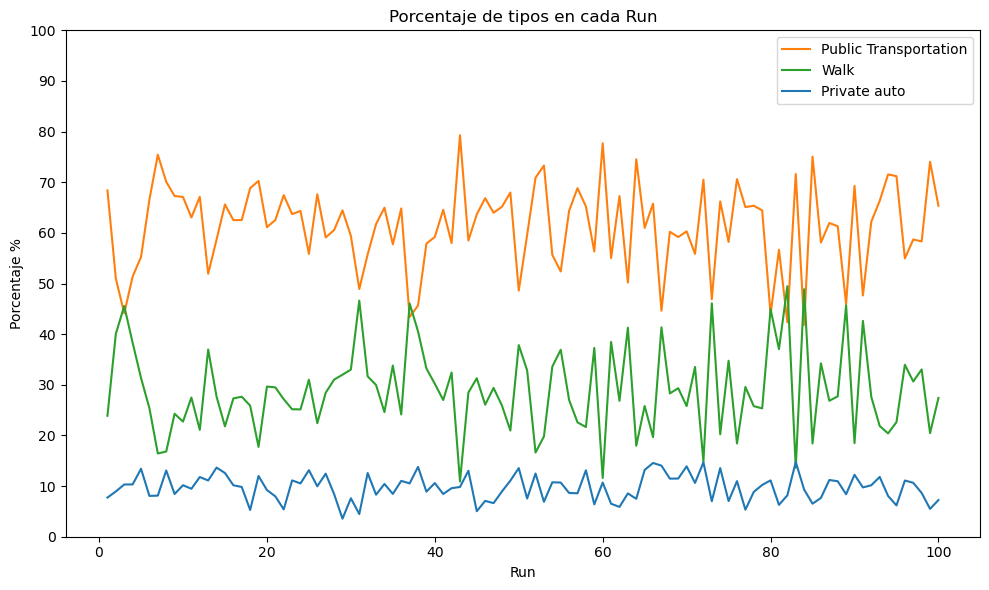

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = "data/What-if 1_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Graficar los porcentajes con líneas
fig, ax = plt.subplots(figsize=(10, 6))

# Definir los colores para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

for column in percentages_df.columns:
    ax.plot(range(1, len(percentages_df.index) + 1), percentages_df[column], label=column, color=colors[column])

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))

# Añadir etiquetas y leyenda
ax.set_xlabel('Run')  # Cambiar a 'Run' si se desea mantener
ax.set_ylabel('Porcentaje %')
ax.set_title('Porcentaje de tipos en cada Run')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


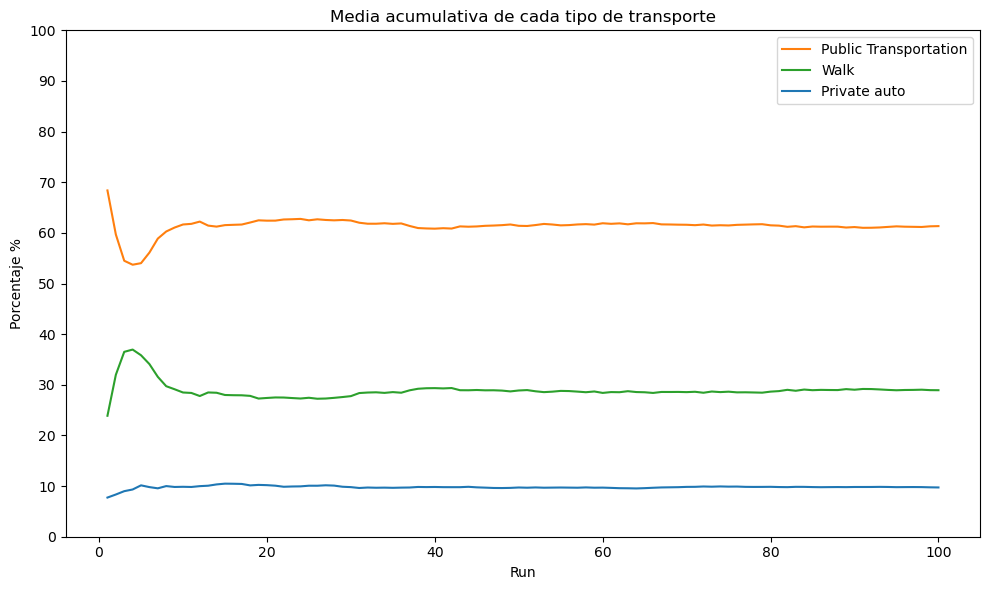

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = "data/What-if 1_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Calcular la media acumulativa de cada tipo de transporte
cumulative_mean = percentages_df.expanding().mean()

# Graficar la media acumulativa con líneas
fig, ax = plt.subplots(figsize=(10, 6))

# Colores específicos para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

# Graficar la media acumulativa de cada tipo de transporte con colores específicos
for column in cumulative_mean.columns:
    ax.plot(range(1, len(cumulative_mean) + 1), cumulative_mean[column], label=column, color=colors[column])

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))

# Añadir etiquetas y leyenda
ax.set_xlabel('Run')
ax.set_ylabel('Porcentaje %')
ax.set_title('Media acumulativa de cada tipo de transporte')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


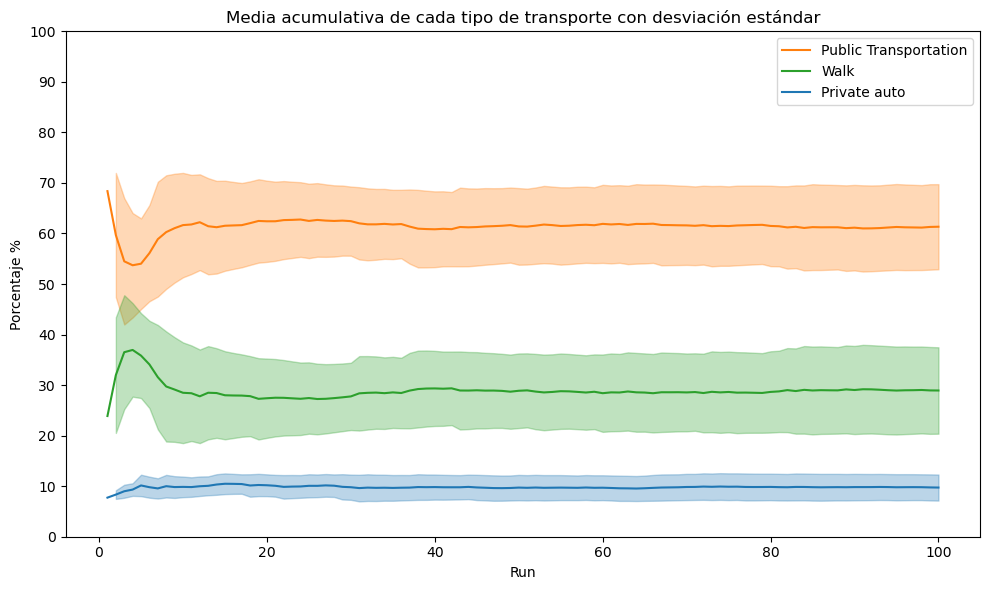

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = "data/What-if 1_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Calcular la media acumulativa y la desviación estándar de cada tipo de transporte
cumulative_mean = percentages_df.expanding().mean()
cumulative_std = percentages_df.expanding().std()

# Graficar la media acumulativa con líneas y añadir la desviación estándar como sombreado
fig, ax = plt.subplots(figsize=(10, 6))

# Colores específicos para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

for column in cumulative_mean.columns:
    ax.plot(range(1, len(cumulative_mean) + 1), cumulative_mean[column], label=column, color=colors[column])
    ax.fill_between(range(1, len(cumulative_mean) + 1),
                    cumulative_mean[column] - cumulative_std[column],
                    cumulative_mean[column] + cumulative_std[column],
                    color=colors[column], alpha=0.3)

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))

# Añadir etiquetas y leyenda
ax.set_xlabel('Run')
ax.set_ylabel('Porcentaje %')
ax.set_title('Media acumulativa de cada tipo de transporte con desviación estándar')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [13]:
print(percentages_df.T.iloc[0].mean())
print(percentages_df.T.iloc[0].std())
print(percentages_df.T.iloc[0].max())
print(percentages_df.T.iloc[0].min())

61.33820970197955
8.422313947885689
79.27452686534696
41.815314335436156


1.9842169515086827


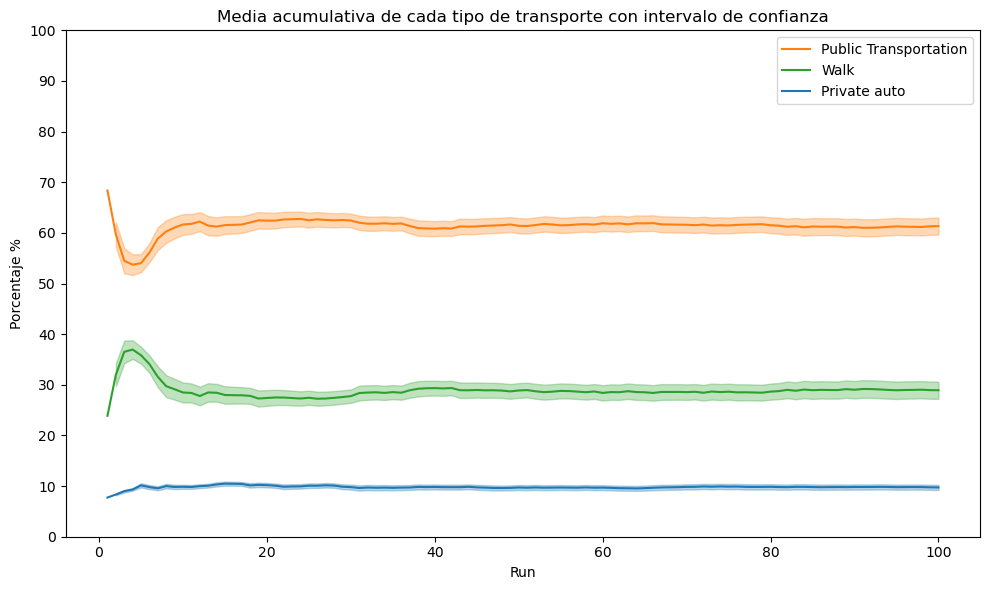

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Cargar el archivo CSV
file_path = "data/What-if 1_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Calcular la media acumulativa y el intervalo de confianza de cada tipo de transporte
cumulative_mean = percentages_df.expanding().mean()
n = len(percentages_df)
alpha = 0.05  # Nivel de confianza del 95%
t_value = t.ppf(1 - alpha / 2, n - 1)  # Valor t para el intervalo de confianza
print(t_value)
margin_error = t_value * percentages_df.expanding().std() / np.sqrt(n)

# Graficar la media acumulativa con líneas y añadir el intervalo de confianza
fig, ax = plt.subplots(figsize=(10, 6))

# Colores específicos para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

for column in cumulative_mean.columns:
    ax.plot(range(1, len(cumulative_mean) + 1), cumulative_mean[column], label=column, color=colors[column])
    ax.fill_between(range(1, len(cumulative_mean) + 1),
                    cumulative_mean[column] - margin_error[column],
                    cumulative_mean[column] + margin_error[column],
                    color=colors[column], alpha=0.3)

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))

# Añadir etiquetas y leyenda
ax.set_xlabel('Run')
ax.set_ylabel('Porcentaje %')
ax.set_title('Media acumulativa de cada tipo de transporte con intervalo de confianza')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import t

# Supongamos que ya tienes calculadas las variables cumulative_mean y margin_error como en tu código anterior

# Número de "Runs" a imprimir cada 10
runs_to_print = 10

# Imprimir la media acumulada y el intervalo de confianza cada 10 "Runs"
for i in range(0, len(cumulative_mean), runs_to_print):
    print(f"Media acumulada hasta el Run {i + runs_to_print}:")
    for column in cumulative_mean.columns:
        mean_value = cumulative_mean[column].iloc[i + runs_to_print - 1]
        error_value = margin_error[column].iloc[i + runs_to_print - 1]
        print(f"{column}: {mean_value:.2f}% ± {error_value:.2f}%")
    print()


Media acumulada hasta el Run 10:
Public Transportation: 61.66% ± 2.05%
Walk: 28.48% ± 1.98%
Private auto: 9.86% ± 0.40%

Media acumulada hasta el Run 20:
Public Transportation: 62.41% ± 1.59%
Walk: 27.40% ± 1.56%
Private auto: 10.18% ± 0.43%

Media acumulada hasta el Run 30:
Public Transportation: 62.44% ± 1.36%
Walk: 27.76% ± 1.32%
Private auto: 9.79% ± 0.49%

Media acumulada hasta el Run 40:
Public Transportation: 60.83% ± 1.49%
Walk: 29.34% ± 1.47%
Private auto: 9.82% ± 0.49%

Media acumulada hasta el Run 50:
Public Transportation: 61.40% ± 1.50%
Walk: 28.88% ± 1.46%
Private auto: 9.72% ± 0.50%

Media acumulada hasta el Run 60:
Public Transportation: 61.90% ± 1.53%
Walk: 28.40% ± 1.52%
Private auto: 9.70% ± 0.49%

Media acumulada hasta el Run 70:
Public Transportation: 61.60% ± 1.55%
Walk: 28.55% ± 1.53%
Private auto: 9.84% ± 0.52%

Media acumulada hasta el Run 80:
Public Transportation: 61.49% ± 1.58%
Walk: 28.65% ± 1.60%
Private auto: 9.85% ± 0.52%

Media acumulada hasta el Run 90

1.9904502099893602


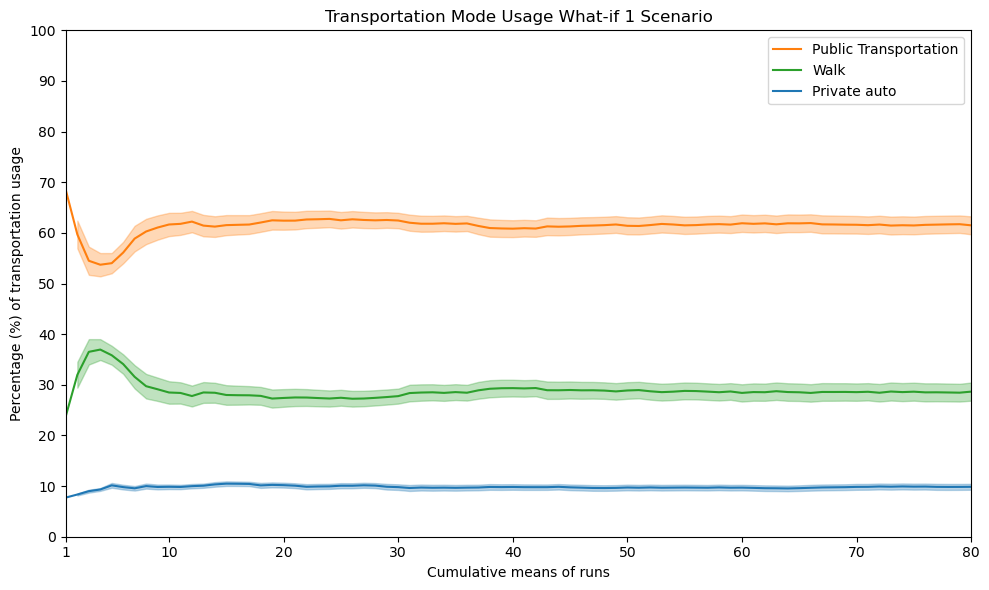

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Cargar el archivo CSV
file_path = "data/What-if 1_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Limitar los run_columns a los primeros 80
run_columns = run_columns[:80]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Calcular la media acumulativa y el intervalo de confianza de cada tipo de transporte
cumulative_mean = percentages_df.expanding().mean()
n = len(percentages_df)
alpha = 0.05  # Nivel de confianza del 95%
t_value = t.ppf(1 - alpha / 2, n - 1)  # Valor t para el intervalo de confianza
print(t_value)
margin_error = t_value * percentages_df.expanding().std() / np.sqrt(n)

# Graficar la media acumulativa con líneas y añadir el intervalo de confianza
fig, ax = plt.subplots(figsize=(10, 6))

# Colores específicos para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

for column in cumulative_mean.columns:
    ax.plot(range(1, len(cumulative_mean) + 1), cumulative_mean[column], label=column, color=colors[column])
    ax.fill_between(range(1, len(cumulative_mean) + 1),
                    cumulative_mean[column] - margin_error[column],
                    cumulative_mean[column] + margin_error[column],
                    color=colors[column], alpha=0.3)

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.set_xlim(1, 80)  # Limitar el eje x a 80 runs
ax.set_xticks([1, 10, 20, 30, 40, 50, 60, 70, 80])

# Añadir etiquetas y leyenda
ax.set_xlabel('Cumulative means of runs')
ax.set_ylabel('Percentage (%) of transportation usage')
ax.set_title('Transportation Mode Usage What-if 1 Scenario')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


2.009575234489209


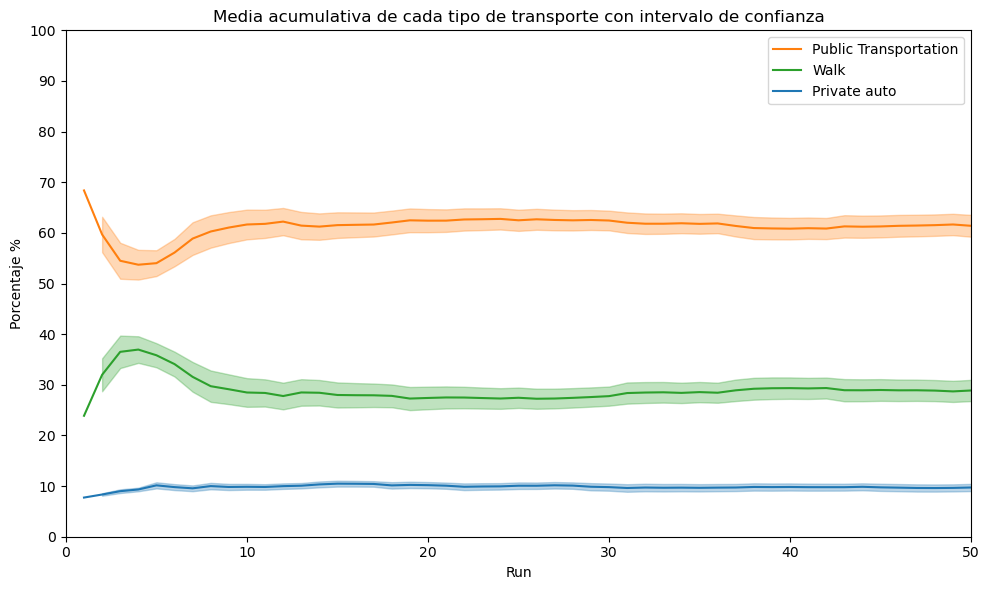

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Cargar el archivo CSV
file_path = "data/What-if 1_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Limitar los run_columns a los primeros 80
run_columns = run_columns[:50]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Calcular la media acumulativa y el intervalo de confianza de cada tipo de transporte
cumulative_mean = percentages_df.expanding().mean()
n = len(percentages_df)
alpha = 0.05  # Nivel de confianza del 95%
t_value = t.ppf(1 - alpha / 2, n - 1)  # Valor t para el intervalo de confianza
print(t_value)
margin_error = t_value * percentages_df.expanding().std() / np.sqrt(n)

# Graficar la media acumulativa con líneas y añadir el intervalo de confianza
fig, ax = plt.subplots(figsize=(10, 6))

# Colores específicos para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

for column in cumulative_mean.columns:
    ax.plot(range(1, len(cumulative_mean) + 1), cumulative_mean[column], label=column, color=colors[column])
    ax.fill_between(range(1, len(cumulative_mean) + 1),
                    cumulative_mean[column] - margin_error[column],
                    cumulative_mean[column] + margin_error[column],
                    color=colors[column], alpha=0.3)

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.set_xlim(1, 50)  # Limitar el eje x a 80 runs
ax.set_xticks(range(0, 51, 10))  # Ticks en el eje x cada 10 runs

# Añadir etiquetas y leyenda
ax.set_xlabel('Run')
ax.set_ylabel('Porcentaje %')
ax.set_title('Media acumulativa de cada tipo de transporte con intervalo de confianza')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


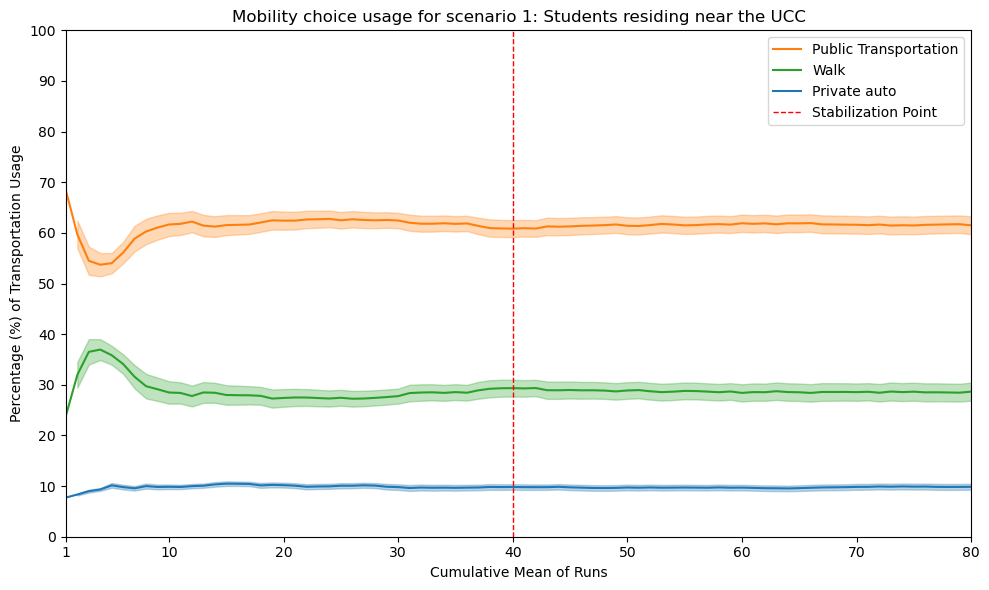

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Cargar el archivo CSV
file_path = "data/What-if 1_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Limitar los run_columns a los primeros 80
run_columns = run_columns[:80]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Calcular la media acumulativa y el intervalo de confianza de cada tipo de transporte
cumulative_mean = percentages_df.expanding().mean()
n = len(percentages_df)
alpha = 0.05  # Nivel de confianza del 95%
t_value = t.ppf(1 - alpha / 2, n - 1)  # Valor t para el intervalo de confianza
margin_error = t_value * percentages_df.expanding().std() / np.sqrt(n)

# Graficar la media acumulativa con líneas y añadir el intervalo de confianza
fig, ax = plt.subplots(figsize=(10, 6))

# Colores específicos para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

for column in cumulative_mean.columns:
    ax.plot(range(1, len(cumulative_mean) + 1), cumulative_mean[column], label=column, color=colors[column])
    ax.fill_between(range(1, len(cumulative_mean) + 1),
                    cumulative_mean[column] - margin_error[column],
                    cumulative_mean[column] + margin_error[column],
                    color=colors[column], alpha=0.3)

# Añadir línea vertical en el run 40
ax.axvline(x=40, color='red', linestyle='--', linewidth=1, label='Stabilization Point')

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.set_xlim(1, 80)  # Limitar el eje x a 80 runs
ax.set_xticks([1, 10, 20, 30, 40, 50, 60, 70, 80])

# Añadir etiquetas y leyenda
ax.set_xlabel('Cumulative Mean of Runs')
ax.set_ylabel('Percentage (%) of Transportation Usage')
ax.set_title('Mobility choice usage for scenario 1: Students residing near the UCC')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


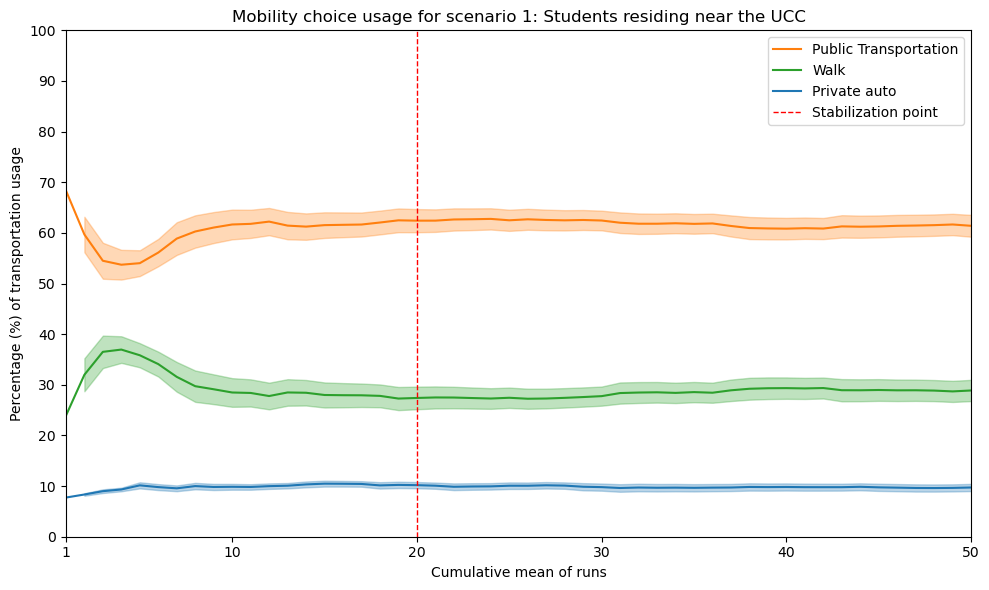

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Cargar el archivo CSV
file_path = "data/What-if 1_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Limitar los run_columns a los primeros 80
run_columns = run_columns[:50]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Calcular la media acumulativa y el intervalo de confianza de cada tipo de transporte
cumulative_mean = percentages_df.expanding().mean()
n = len(percentages_df)
alpha = 0.05  # Nivel de confianza del 95%
t_value = t.ppf(1 - alpha / 2, n - 1)  # Valor t para el intervalo de confianza
margin_error = t_value * percentages_df.expanding().std() / np.sqrt(n)

# Graficar la media acumulativa con líneas y añadir el intervalo de confianza
fig, ax = plt.subplots(figsize=(10, 6))

# Colores específicos para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

for column in cumulative_mean.columns:
    ax.plot(range(1, len(cumulative_mean) + 1), cumulative_mean[column], label=column, color=colors[column])
    ax.fill_between(range(1, len(cumulative_mean) + 1),
                    cumulative_mean[column] - margin_error[column],
                    cumulative_mean[column] + margin_error[column],
                    color=colors[column], alpha=0.3)

# Añadir línea vertical en el run 40
ax.axvline(x=20, color='red', linestyle='--', linewidth=1, label='Stabilization point')

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.set_xlim(1, 50)  # Limitar el eje x a 80 runs
ax.set_xticks([1, 10, 20, 30, 40, 50])

# Añadir etiquetas y leyenda
ax.set_xlabel('Cumulative mean of runs')
ax.set_ylabel('Percentage (%) of transportation usage')
ax.set_title('Mobility choice usage for scenario 1: Students residing near the UCC')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()